In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os 
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas

In [210]:
#read in csv file
cities_list = pd.read_csv("Resources/cities_airports_hotel_lim.csv", index_col="City_ID")
    
cities_list.head(15)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Number of Hotels,Number of Resturants,Bodies of Water,Tourist Attractions,Natural Places,Hospital,Entertainment,Rental Car,Airport
City_ID,,,,,,,,,,,,,,,,,,
4053,khark,29.2614,50.3306,26.32,54,0,2.94,IR,2023-04-28 11:03:50,0,0,5,3,7,1,0,0,1
41,newman,37.3138,-121.0208,27.81,45,0,0.89,US,2023-04-28 10:40:44,1,14,200,3,200,0,3,0,1
251,dogonbadan,30.3586,50.7981,24.05,29,0,2.06,IR,2023-04-28 10:41:52,1,3,2,0,13,4,1,0,1
429,al wajh,26.2455,36.4525,25.97,65,0,4.63,SA,2023-04-28 10:42:53,1,0,2,3,1,1,0,0,1
733,al awjam,26.5632,49.9433,28.06,34,0,3.60,SA,2023-04-28 10:44:40,2,45,28,9,36,10,0,0,1
2604,santana do paraiso,-19.3636,-42.5686,28.18,51,0,2.57,BR,2023-04-28 10:55:45,3,17,48,5,106,10,1,0,1
2329,brownwood,31.7093,-98.9912,25.00,57,0,7.20,US,2023-04-28 10:54:21,3,6,21,0,22,1,1,0,1
608,al kharijah,25.4514,30.5464,25.47,23,0,5.55,EG,2023-04-28 10:43:53,3,2,24,8,26,1,0,0,1
3633,goya,-29.1400,-59.2626,28.96,31,0,4.87,AR,2023-04-28 11:01:27,4,0,200,3,200,4,2,0,3


In [212]:
#read in crime csv
crime_data = pd.read_csv("Resources/crime_country_data_2023.csv")
    
crime_data.head()

,place,pop2023,growthRate,area,country,cca3,cca2,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
0,862,28838499.0,0.01897,916445,Venezuela,VEN,VE,862,South America,"South America, Latin America",882050.0,32.6949,84.6797,52,83.76,1
1,598,10329931.0,0.01847,462840,Papua New Guinea,PNG,PG,598,Oceania,Melanesia,452860.0,22.8104,59.0790,92,80.79,2
2,710,60414495.0,0.00869,1221037,South Africa,ZAF,ZA,710,Africa,"Southern Africa, Sub-Saharan Africa",1213090.0,49.8022,128.9876,24,76.86,3
3,4,42239854.0,0.02702,652230,Afghanistan,AFG,AF,4,Asia,"South Central Asia, Southern Asia",652230.0,64.7622,167.7341,36,76.31,4
4,340,10593798.0,0.01543,112492,Honduras,HND,HN,340,North America,"Central America, Latin America",111890.0,94.6805,245.2224,88,74.54,5


In [211]:
#rename column to merge on 
cities_list.rename(columns={"Country": "cca2"}, inplace=True)
cities_list

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,cca2,Date,Number of Hotels,Number of Resturants,Bodies of Water,Tourist Attractions,Natural Places,Hospital,Entertainment,Rental Car,Airport
City_ID,,,,,,,,,,,,,,,,,,
4053,khark,29.2614,50.3306,26.32,54,0,2.94,IR,2023-04-28 11:03:50,0,0,5,3,7,1,0,0,1
41,newman,37.3138,-121.0208,27.81,45,0,0.89,US,2023-04-28 10:40:44,1,14,200,3,200,0,3,0,1
251,dogonbadan,30.3586,50.7981,24.05,29,0,2.06,IR,2023-04-28 10:41:52,1,3,2,0,13,4,1,0,1
429,al wajh,26.2455,36.4525,25.97,65,0,4.63,SA,2023-04-28 10:42:53,1,0,2,3,1,1,0,0,1
733,al awjam,26.5632,49.9433,28.06,34,0,3.60,SA,2023-04-28 10:44:40,2,45,28,9,36,10,0,0,1
2604,santana do paraiso,-19.3636,-42.5686,28.18,51,0,2.57,BR,2023-04-28 10:55:45,3,17,48,5,106,10,1,0,1
2329,brownwood,31.7093,-98.9912,25.00,57,0,7.20,US,2023-04-28 10:54:21,3,6,21,0,22,1,1,0,1
608,al kharijah,25.4514,30.5464,25.47,23,0,5.55,EG,2023-04-28 10:43:53,3,2,24,8,26,1,0,0,1
3633,goya,-29.1400,-59.2626,28.96,31,0,4.87,AR,2023-04-28 11:01:27,4,0,200,3,200,4,2,0,3


In [213]:
#merge dataframe 
resort_cities_crime = pd.DataFrame.merge(cities_list, crime_data, how="left", on="cca2")

resort_cities_crime

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,cca2,Date,Number of Hotels,...,cca3,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
0,khark,29.2614,50.3306,26.32,54,0,2.94,IR,2023-04-28 11:03:50,0,...,IRN,364.0,Asia,"Southern Asia, The Middle East",1622500.0,54.9601,142.3467,17.0,49.38,48.0
1,newman,37.3138,-121.0208,27.81,45,0,0.89,US,2023-04-28 10:40:44,1,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
2,dogonbadan,30.3586,50.7981,24.05,29,0,2.06,IR,2023-04-28 10:41:52,1,...,IRN,364.0,Asia,"Southern Asia, The Middle East",1622500.0,54.9601,142.3467,17.0,49.38,48.0
3,al wajh,26.2455,36.4525,25.97,65,0,4.63,SA,2023-04-28 10:42:53,1,...,SAU,682.0,Asia,"Western Asia, The Middle East",2149690.0,17.1871,44.5147,40.0,25.23,121.0
4,al awjam,26.5632,49.9433,28.06,34,0,3.60,SA,2023-04-28 10:44:40,2,...,SAU,682.0,Asia,"Western Asia, The Middle East",2149690.0,17.1871,44.5147,40.0,25.23,121.0
5,santana do paraiso,-19.3636,-42.5686,28.18,51,0,2.57,BR,2023-04-28 10:55:45,3,...,BRA,76.0,South America,"South America, Latin America",8358140.0,25.8936,67.0645,7.0,67.49,9.0
6,brownwood,31.7093,-98.9912,25.00,57,0,7.20,US,2023-04-28 10:54:21,3,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
7,al kharijah,25.4514,30.5464,25.47,23,0,5.55,EG,2023-04-28 10:43:53,3,...,EGY,818.0,Africa,"Northern Africa, The Middle East",995450.0,113.2318,293.2704,14.0,46.83,59.0
8,goya,-29.1400,-59.2626,28.96,31,0,4.87,AR,2023-04-28 11:01:27,4,...,ARG,32.0,South America,"South America, Latin America",2736690.0,16.7260,43.3203,33.0,63.82,18.0
9,alegrete,-29.7831,-55.7919,27.34,30,0,4.00,BR,2023-04-28 10:43:02,5,...,BRA,76.0,South America,"South America, Latin America",8358140.0,25.8936,67.0645,7.0,67.49,9.0


In [258]:
#rename column 
resort_cities_crime.rename(columns={"cca2":"Country Tag"}, inplace=True)
resort_cities_crime.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Tag,Date,Number of Hotels,...,cca3,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
0,khark,29.2614,50.3306,26.32,54,0,2.94,IR,2023-04-28 11:03:50,0,...,IRN,364.0,Asia,"Southern Asia, The Middle East",1622500.0,54.9601,142.3467,17.0,49.38,48.0
1,newman,37.3138,-121.0208,27.81,45,0,0.89,US,2023-04-28 10:40:44,1,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
2,dogonbadan,30.3586,50.7981,24.05,29,0,2.06,IR,2023-04-28 10:41:52,1,...,IRN,364.0,Asia,"Southern Asia, The Middle East",1622500.0,54.9601,142.3467,17.0,49.38,48.0
3,al wajh,26.2455,36.4525,25.97,65,0,4.63,SA,2023-04-28 10:42:53,1,...,SAU,682.0,Asia,"Western Asia, The Middle East",2149690.0,17.1871,44.5147,40.0,25.23,121.0
4,al awjam,26.5632,49.9433,28.06,34,0,3.60,SA,2023-04-28 10:44:40,2,...,SAU,682.0,Asia,"Western Asia, The Middle East",2149690.0,17.1871,44.5147,40.0,25.23,121.0


In [215]:
#current travel restrictions in both of these countries -- so drop them from data
clea_resort_cities_crime = resort_cities_crime[resort_cities_crime["country"].str.contains("Saudi Arabia")==False]
clean_resort_cities_crime = clea_resort_cities_crime[clea_resort_cities_crime["country"].str.contains("Iran")==False]
clean_resort_cities_crime.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Tag,Date,Number of Hotels,...,cca3,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
1,newman,37.3138,-121.0208,27.81,45,0,0.89,US,2023-04-28 10:40:44,1,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
5,santana do paraiso,-19.3636,-42.5686,28.18,51,0,2.57,BR,2023-04-28 10:55:45,3,...,BRA,76.0,South America,"South America, Latin America",8358140.0,25.8936,67.0645,7.0,67.49,9.0
6,brownwood,31.7093,-98.9912,25.00,57,0,7.20,US,2023-04-28 10:54:21,3,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
7,al kharijah,25.4514,30.5464,25.47,23,0,5.55,EG,2023-04-28 10:43:53,3,...,EGY,818.0,Africa,"Northern Africa, The Middle East",995450.0,113.2318,293.2704,14.0,46.83,59.0
8,goya,-29.1400,-59.2626,28.96,31,0,4.87,AR,2023-04-28 11:01:27,4,...,ARG,32.0,South America,"South America, Latin America",2736690.0,16.7260,43.3203,33.0,63.82,18.0
9,alegrete,-29.7831,-55.7919,27.34,30,0,4.00,BR,2023-04-28 10:43:02,5,...,BRA,76.0,South America,"South America, Latin America",8358140.0,25.8936,67.0645,7.0,67.49,9.0
10,treinta y tres,-33.2333,-54.3833,27.40,35,0,2.24,UY,2023-04-28 10:51:19,5,...,URY,858.0,South America,"South America, Latin America",175020.0,19.5584,50.6562,135.0,51.73,45.0
11,francisco beltrao,-26.0811,-53.0550,24.12,52,0,1.10,BR,2023-04-28 10:47:38,5,...,BRA,76.0,South America,"South America, Latin America",8358140.0,25.8936,67.0645,7.0,67.49,9.0
12,zachary,30.6485,-91.1565,26.52,51,0,2.41,US,2023-04-28 10:45:15,6,...,USA,840.0,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
13,general pinedo,-27.3167,-61.2833,28.23,50,0,1.79,AR,2023-04-28 11:04:52,6,...,ARG,32.0,South America,"South America, Latin America",2736690.0,16.7260,43.3203,33.0,63.82,18.0


In [216]:
#count number of cities in each country
country_count = clean_resort_cities_crime['country'].value_counts()

print(country_count)

United States    8
Brazil           6
Uruguay          5
Argentina        3
Egypt            1
Libya            1
Bahrain          1
Chile            1
Name: country, dtype: int64


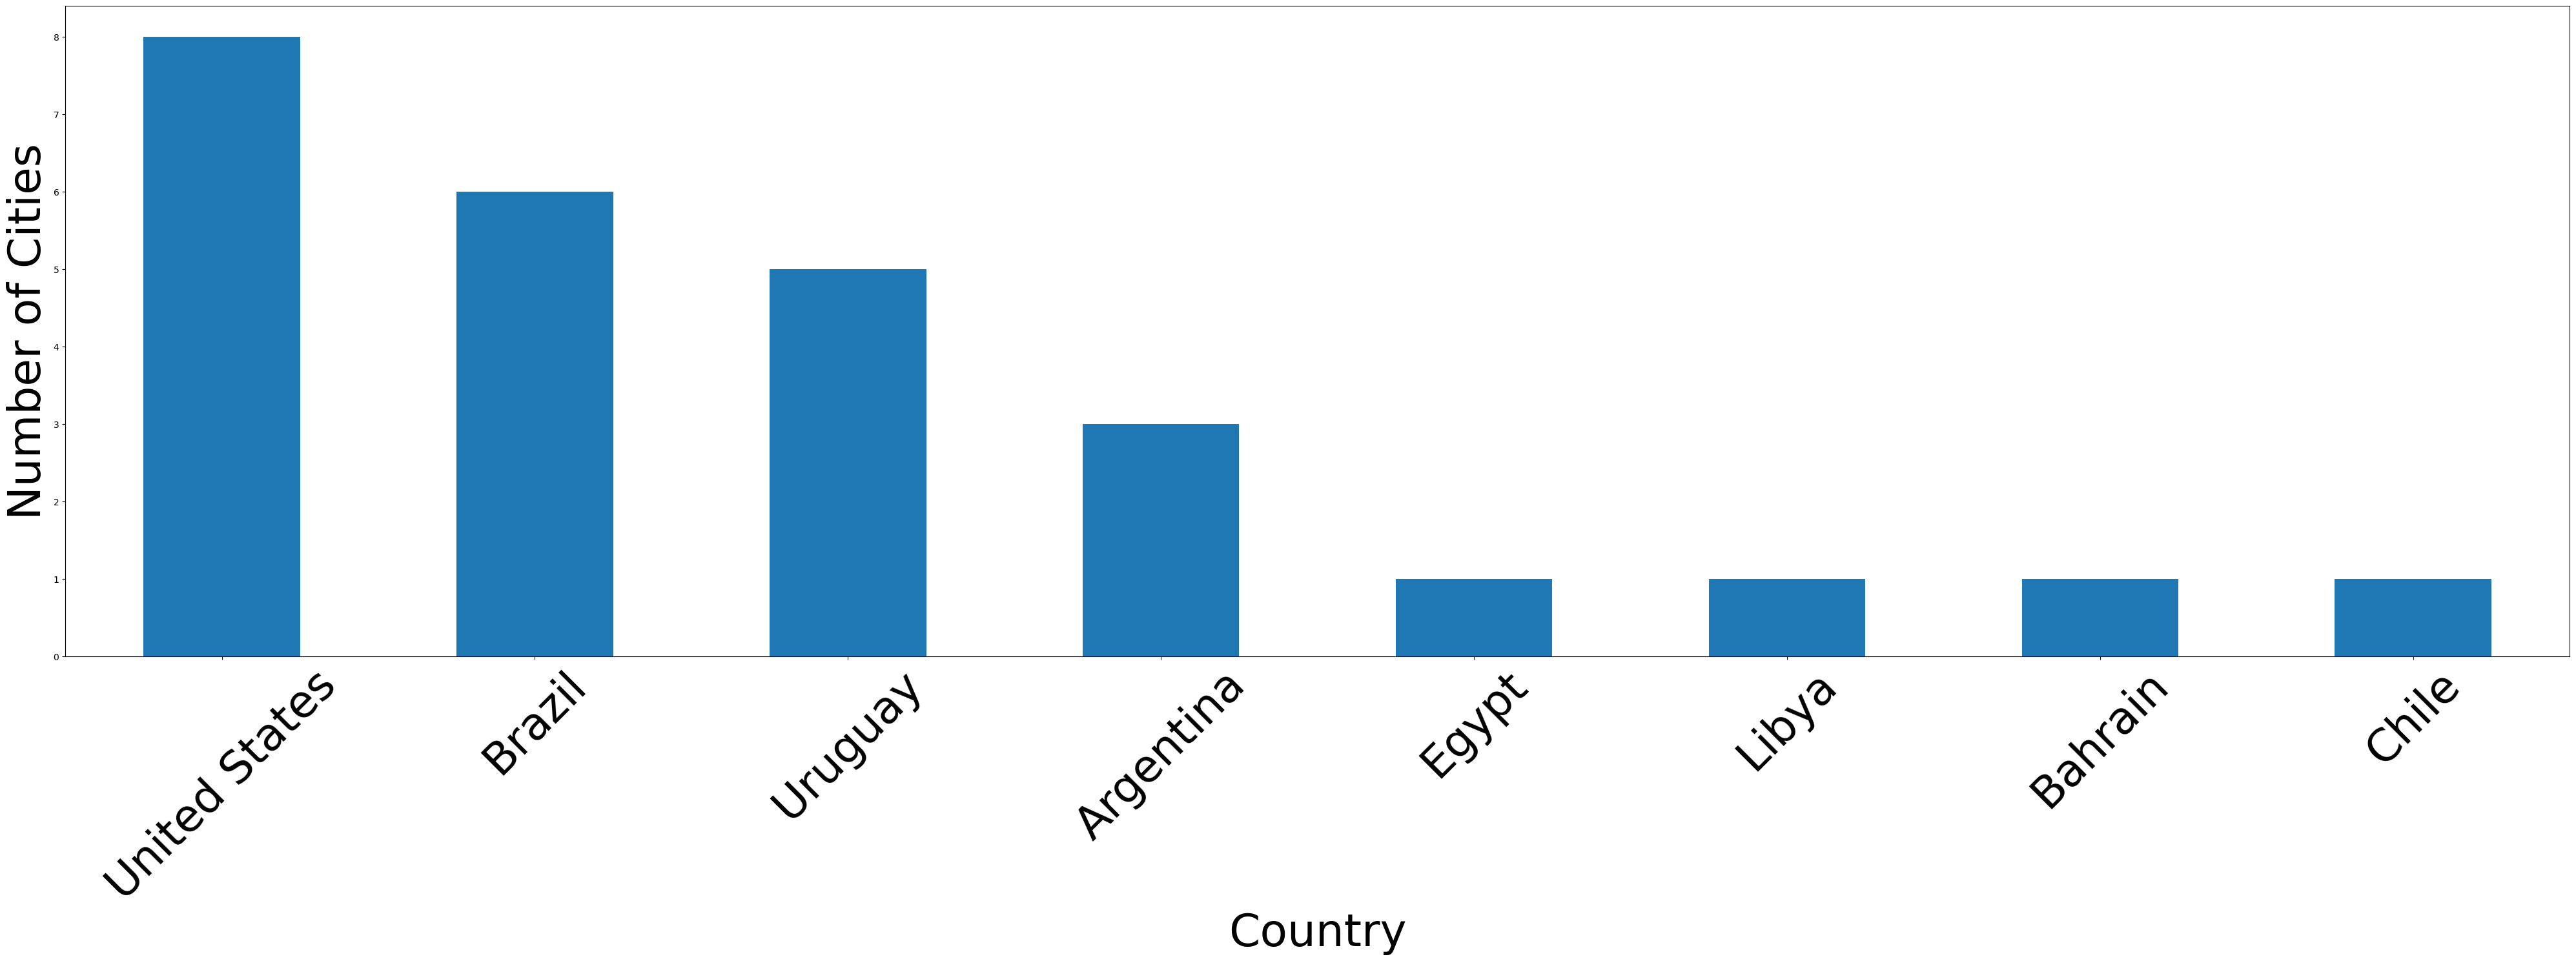

In [217]:
#plot count of cities in each country 
country_count = clean_resort_cities_crime['country'].value_counts()

plt.figure(figsize=(40,15))
ax = country_count.plot(kind='bar')
ax.set_xticklabels(country_count.index,rotation=45,fontsize=50)
plt.xlabel('Country',fontsize=50)
plt.ylabel('Number of Cities', fontsize=50)
plt.tight_layout()

plt.savefig("out_put/Fig2_bigger.png")

In [237]:
#create dataframe with country and crimeindex to prepare for plot
country_crime_df = clean_resort_cities_crime[["country", "crimeIndex"]]
country_crime_df

,country,crimeIndex
1,United States,47.81
5,Brazil,67.49
6,United States,47.81
7,Egypt,46.83
8,Argentina,63.82
9,Brazil,67.49
10,Uruguay,51.73
11,Brazil,67.49
12,United States,47.81
13,Argentina,63.82


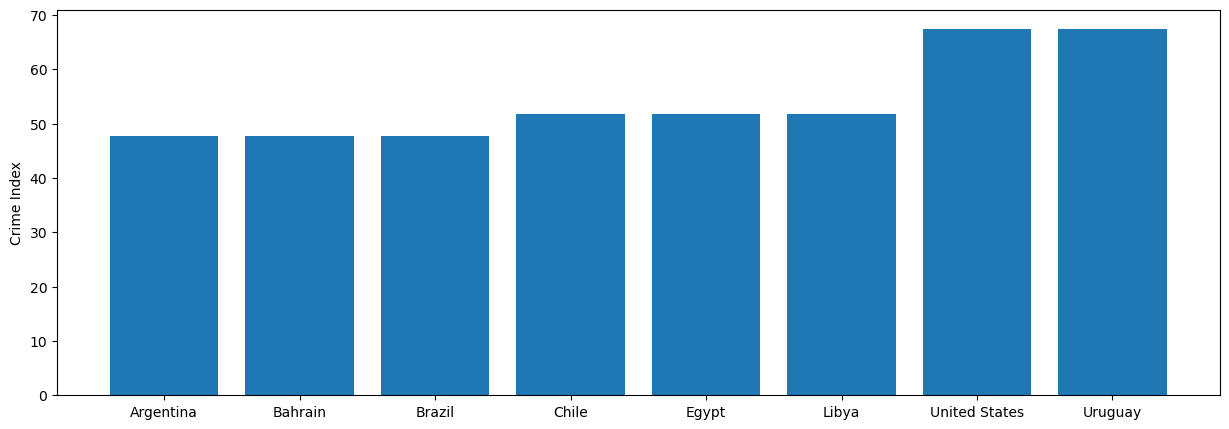

In [257]:
#plot country and crime rate 
xcountry = country_crime_df["country"].sort_values()
ycrime = country_crime_df["crimeIndex"].sort_values()

plt.figure(figsize=(15,5))
plt.bar(xcountry, ycrime)

plt.ylabel("Crime Index")


plt.savefig("out_put/Fig7_crime.png")

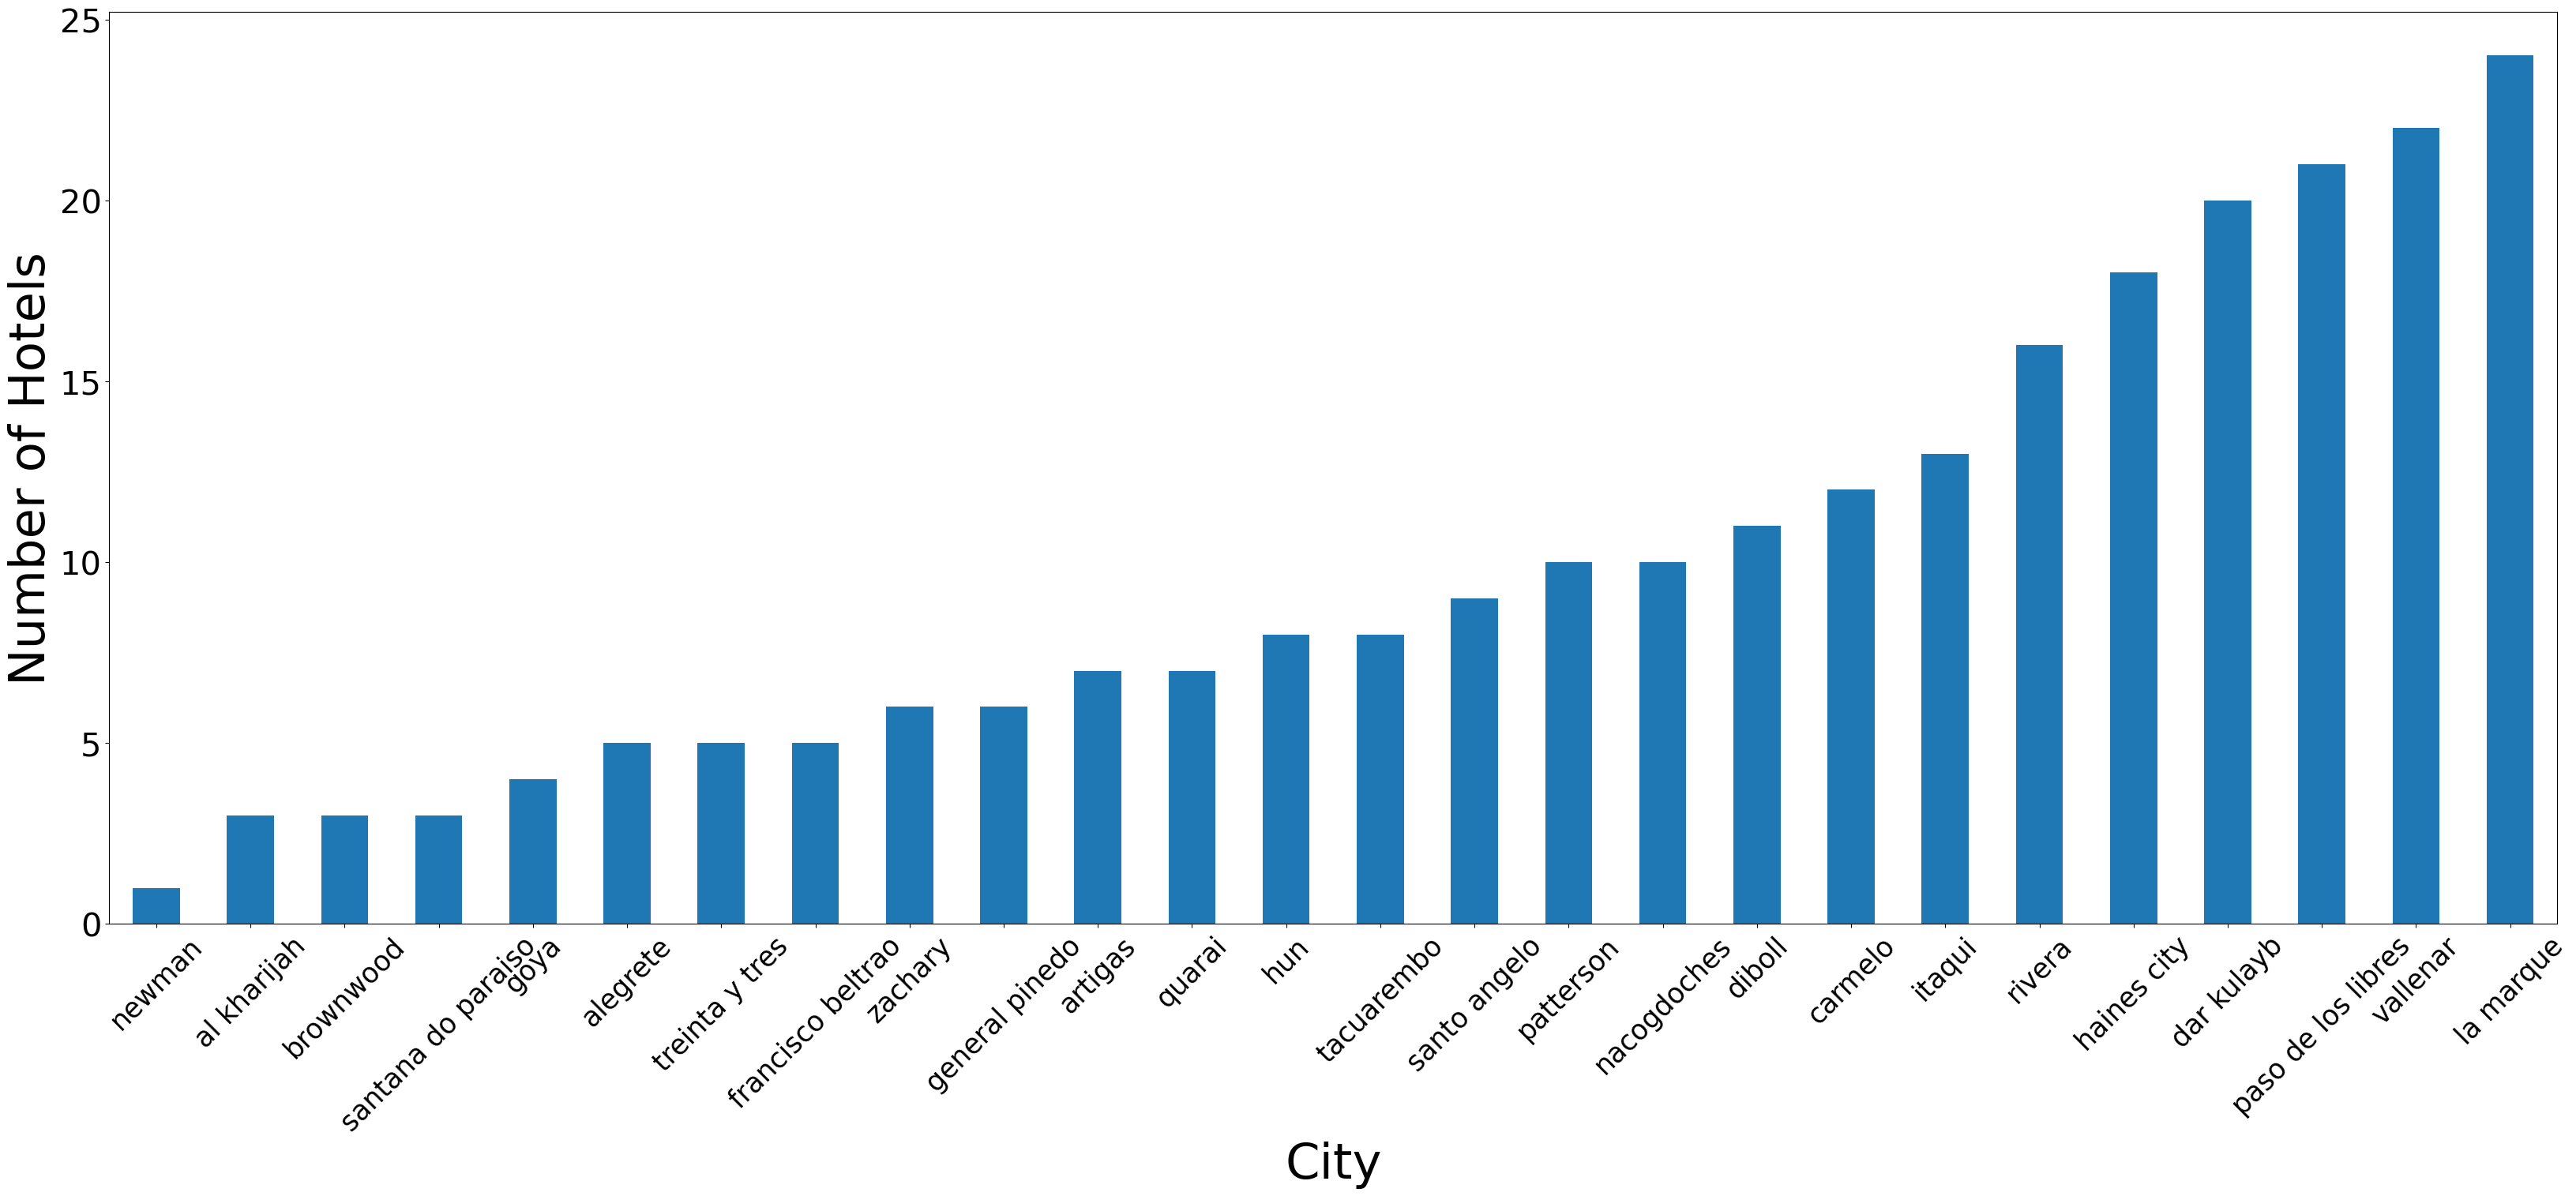

In [196]:
#plot number of hotels in each city
resort_cities_crime_plt = clean_resort_cities_crime.groupby("City")["Number of Hotels"].sum().sort_values(ascending=True)

plt.figure(figsize=(40,15))
ax = resort_cities_crime_plt.plot(kind='bar', fontsize=30)
ax.set_xticklabels(resort_cities_crime_plt.index,rotation=45,fontsize=25)
plt.xlabel('City',fontsize=45)
plt.ylabel('Number of Hotels', fontsize=45)


plt.savefig("out_put/Fig3_hotels.png")

plt.show()

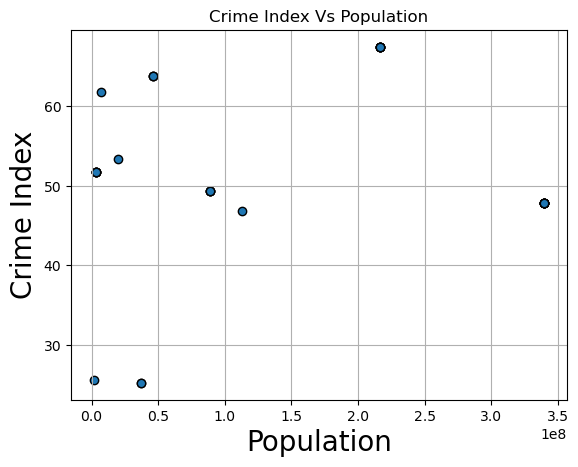

In [160]:
#scatterplot of crime index and population 
pop= resort_cities_crime['pop2023']
crime_index= resort_cities_crime['crimeIndex']


plt.scatter(pop, crime_index, edgecolors='black')

plt.grid()
plt.xlabel('Population', fontsize=20)
plt.ylabel('Crime Index', fontsize=20)
plt.title('Crime Index Vs Population')

plt.savefig("out_put/Fig8.png")

plt.show()


In [159]:
#population was plotting strangly so just checking to see what the data looked like 
clean_resort_cities_crime["pop2023"].head()

1    339996563.0
5    216422446.0
6    339996563.0
7    112716598.0
8     45773884.0
Name: pop2023, dtype: float64

In [161]:
#function for line regression 
def plot_linearregression(x_values, y_values, x_label, y_label, annotation_loc):
    
    model = st.linregress(x_values, y_values)

    y_pred = x_values * model[0] + model[1]

    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_pred, color = "red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line_eq = f" y = {round(model[0],2)}x + {round(model[1],2)}"
    plt.annotate(line_eq, annotation_loc, fontsize=15, color="red")
    plt.show()

    print(f"The R squared is: {(model[2])**2}.")

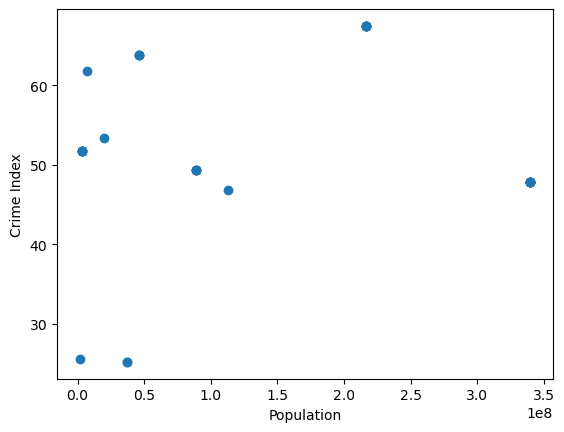

The R squared is: nan.


<Figure size 640x480 with 0 Axes>

In [123]:
#see if there is a correlation between population and crime index
plot_linearregression(pop, crime_index, "Population", "Crime Index", (5, -10))

plt.savefig("out_put/linear_regress.png")

In [167]:
#sort dataframe by crimeIndex
sorted_crime_index = clean_resort_cities_crime.sort_values(by=['crimeIndex'], ascending=True)
sorted_crime_index.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Number of Hotels,Number of Resturants,...,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
29,dar kulayb,26.0686,50.5039,28.09,52,0,4.20,2023-04-28 11:00:32,20,200,...,Bahrain,BHR,Asia,"Western Asia, The Middle East",785.0,1892.3682,4901.2335,154.0,25.64,118.0
7,al kharijah,25.4514,30.5464,25.47,23,0,5.55,2023-04-28 10:43:53,3,2,...,Egypt,EGY,Africa,"Northern Africa, The Middle East",995450.0,113.2318,293.2704,14.0,46.83,59.0
1,newman,37.3138,-121.0208,27.81,45,0,0.89,2023-04-28 10:40:44,1,14,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
28,haines city,28.1142,-81.6179,29.34,69,0,3.60,2023-04-28 10:53:31,18,50,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
22,diboll,31.1871,-94.7810,25.68,59,0,2.57,2023-04-28 10:59:24,11,25,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0


In [172]:
#set limitation on crime index 
lower_crime_sorted = sorted_crime_index[sorted_crime_index["crimeIndex"] < 55]

lower_crime_sorted

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Number of Hotels,Number of Resturants,...,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,crimeIndex,rank
29,dar kulayb,26.0686,50.5039,28.09,52,0,4.20,2023-04-28 11:00:32,20,200,...,Bahrain,BHR,Asia,"Western Asia, The Middle East",785.0,1892.3682,4901.2335,154.0,25.64,118.0
7,al kharijah,25.4514,30.5464,25.47,23,0,5.55,2023-04-28 10:43:53,3,2,...,Egypt,EGY,Africa,"Northern Africa, The Middle East",995450.0,113.2318,293.2704,14.0,46.83,59.0
1,newman,37.3138,-121.0208,27.81,45,0,0.89,2023-04-28 10:40:44,1,14,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
28,haines city,28.1142,-81.6179,29.34,69,0,3.60,2023-04-28 10:53:31,18,50,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
22,diboll,31.1871,-94.7810,25.68,59,0,2.57,2023-04-28 10:59:24,11,25,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
21,nacogdoches,31.6002,-94.6335,24.76,64,0,1.89,2023-04-28 10:48:59,10,9,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
20,patterson,37.4716,-121.1297,28.34,41,0,1.46,2023-04-28 10:57:41,10,5,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
12,zachary,30.6485,-91.1565,26.52,51,0,2.41,2023-04-28 10:45:15,6,1,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
32,la marque,29.3686,-94.9713,29.49,61,0,3.60,2023-04-28 11:01:13,24,30,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0
6,brownwood,31.7093,-98.9912,25.00,57,0,7.20,2023-04-28 10:54:21,3,6,...,United States,USA,North America,Northern America,9147420.0,37.1686,96.2666,3.0,47.81,56.0


In [177]:
#create new dataframe with following columns City	country	crimeIndex	pop2023	Max Temp	Humidity	Number of Hotels	Number of Resturants	Bodies of Water	Natural Places	Hospital	Date
lower_crime_sorted_final = lower_crime_sorted[["City",  "country", "crimeIndex", "pop2023", "Max Temp", "Humidity", "Number of Hotels", "Number of Resturants", "Bodies of Water", "Natural Places","Hospital", "Date"]]
lower_crime_sorted_final

,City,country,crimeIndex,pop2023,Max Temp,Humidity,Number of Hotels,Number of Resturants,Bodies of Water,Natural Places,Hospital,Date
29,dar kulayb,Bahrain,25.64,1485509.0,28.09,52,20,200,47,200,11,2023-04-28 11:00:32
7,al kharijah,Egypt,46.83,112716598.0,25.47,23,3,2,24,26,1,2023-04-28 10:43:53
1,newman,United States,47.81,339996563.0,27.81,45,1,14,200,200,0,2023-04-28 10:40:44
28,haines city,United States,47.81,339996563.0,29.34,69,18,50,200,200,3,2023-04-28 10:53:31
22,diboll,United States,47.81,339996563.0,25.68,59,11,25,76,87,1,2023-04-28 10:59:24
21,nacogdoches,United States,47.81,339996563.0,24.76,64,10,9,71,98,2,2023-04-28 10:48:59
20,patterson,United States,47.81,339996563.0,28.34,41,10,5,200,200,0,2023-04-28 10:57:41
12,zachary,United States,47.81,339996563.0,26.52,51,6,1,69,95,1,2023-04-28 10:45:15
32,la marque,United States,47.81,339996563.0,29.49,61,24,30,200,200,1,2023-04-28 11:01:13
6,brownwood,United States,47.81,339996563.0,25.00,57,3,6,21,22,1,2023-04-28 10:54:21


In [188]:
#sort final selection of cities by number of hotels and reset index
lower_crime_hotels_sorted = lower_crime_sorted_final[lower_crime_sorted_final["Number of Hotels"] < 15]

index_reset_lower_crime_hotels_sorted = lower_crime_hotels_sorted.reset_index()

index_reset_lower_crime_hotels_sorted.drop(columns=["index"])

,City,country,crimeIndex,pop2023,Max Temp,Humidity,Number of Hotels,Number of Resturants,Bodies of Water,Natural Places,Hospital,Date
0,al kharijah,Egypt,46.83,112716598.0,25.47,23,3,2,24,26,1,2023-04-28 10:43:53
1,newman,United States,47.81,339996563.0,27.81,45,1,14,200,200,0,2023-04-28 10:40:44
2,diboll,United States,47.81,339996563.0,25.68,59,11,25,76,87,1,2023-04-28 10:59:24
3,nacogdoches,United States,47.81,339996563.0,24.76,64,10,9,71,98,2,2023-04-28 10:48:59
4,patterson,United States,47.81,339996563.0,28.34,41,10,5,200,200,0,2023-04-28 10:57:41
5,zachary,United States,47.81,339996563.0,26.52,51,6,1,69,95,1,2023-04-28 10:45:15
6,brownwood,United States,47.81,339996563.0,25.00,57,3,6,21,22,1,2023-04-28 10:54:21
7,tacuarembo,Uruguay,51.73,3423108.0,28.39,28,8,4,15,55,1,2023-04-28 10:54:08
8,artigas,Uruguay,51.73,3423108.0,27.63,30,7,9,42,52,5,2023-04-28 11:01:26
9,treinta y tres,Uruguay,51.73,3423108.0,27.40,35,5,3,21,53,4,2023-04-28 10:51:19


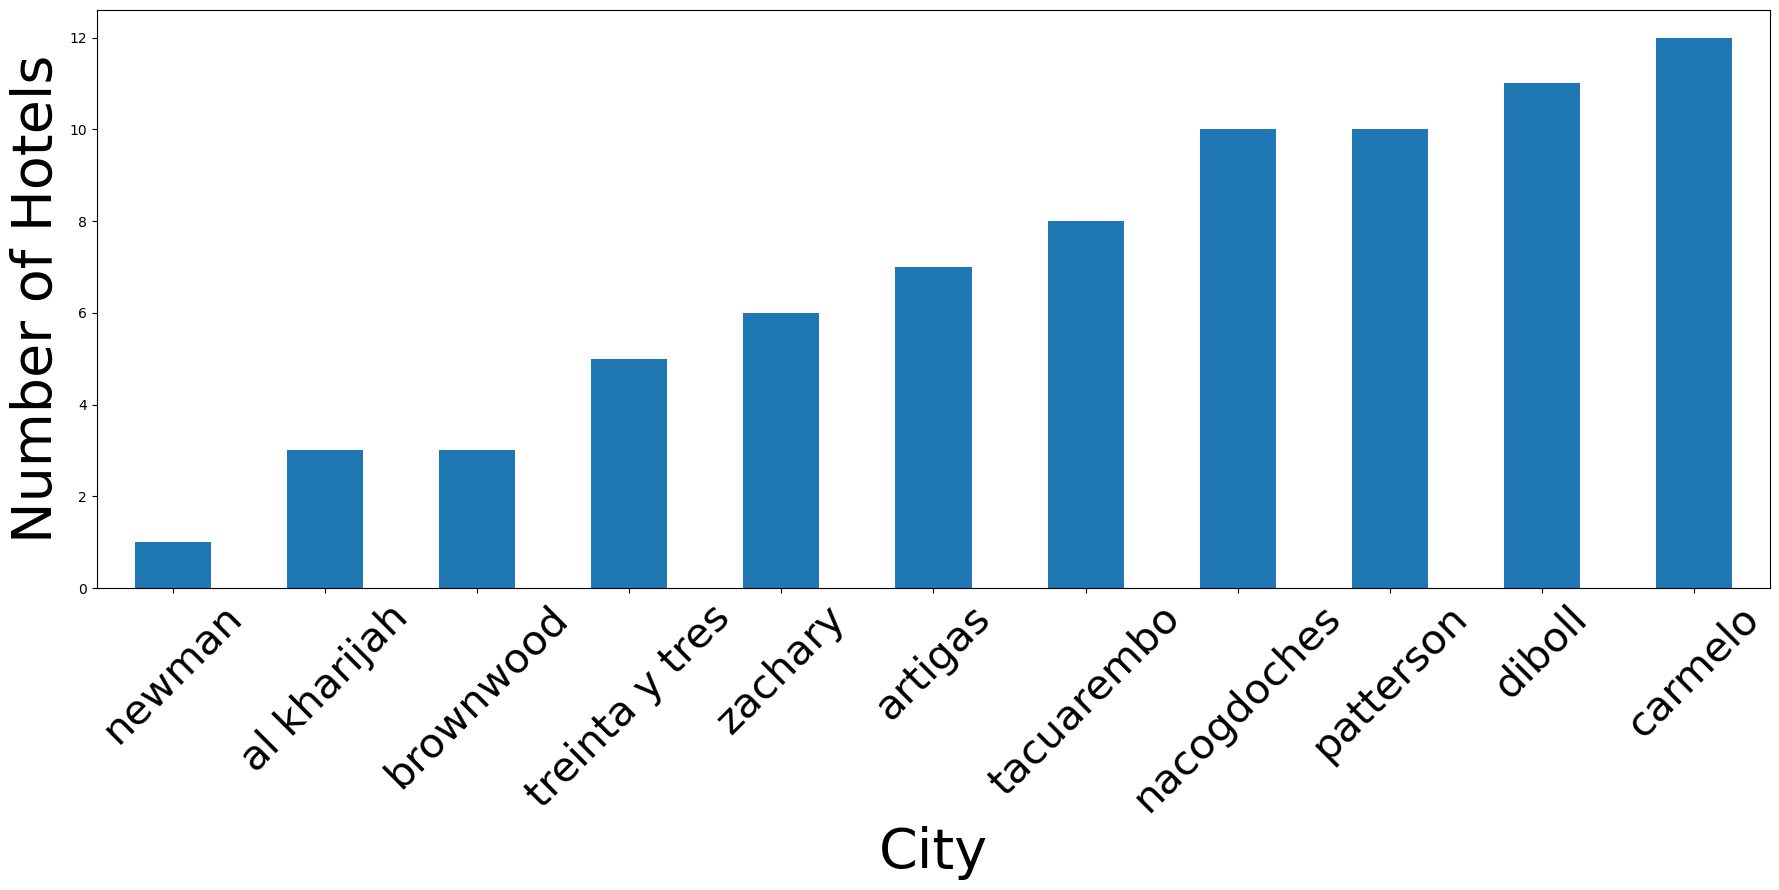

In [198]:
#reset the index of the dataframe 
index_reset_lower_crime_hotels_sorted = index_reset_lower_crime_hotels_sorted.groupby("City")["Number of Hotels"].sum().sort_values(ascending=True).head(15)
                                                                                                            

plt.figure(figsize=(18,9))
ax = index_reset_lower_crime_hotels_sorted.plot(kind='bar')
ax.set_xticklabels(index_reset_lower_crime_hotels_sorted.index, rotation=45, fontsize=30)
plt.xlabel('City', fontsize=40)
plt.ylabel('Number of Hotels', fontsize=40)
plt.tight_layout()

plt.savefig("out_put/Fig3_low_hotels_clean.png")

In [207]:
#geomap of where teh locations are on the map
map_plot_clean = clean_resort_cities_crime.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "crimeIndex",
    color = "country",
    hover_cols=["City","crimeIndex","Country"]
)

# Display the map plot
map_plot_clean

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (country,crimeIndex,City)